In [22]:
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
## 图像显示中文的问题
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

import seaborn as sns 
sns.set(font= "SimSun",style="ticks",font_scale=1.4)

In [23]:
## 导入会使用到的相关库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import  ElasticNetCV,ElasticNet
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.svm import SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.cross_decomposition import PLSRegression
import scipy.stats as ss
import xarray as xr

## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

In [24]:
bajie = pd.read_excel(r'S:\WeChat\Data\WeChat Files\wxid_vvmx9lxqxx1f22\FileStorage\File\2023-02\.ipynb_checkpoints\产量总.xlsx')
bajie

,ID,NDVI1,EVI1,SR1,MTCI1,GNDVI1,NDRE1,LCI1,CIgreen1,CIred1,...,CIgreen7,CIred7,EVI27,mNDVI7,mNDVIre7,MSR7,MSRre7,NDVIre7,RTVI7,YIELD
0,1,0.856550,0.549745,13.587362,1.224404,0.752551,0.338998,0.469347,6.251787,1.032244,...,3.192409,0.698300,0.141060,0.742600,0.312395,1.254406,0.419263,0.252355,9.859893,112.0927
1,2,0.808740,0.482898,10.834207,1.183232,0.722481,0.316661,0.434407,5.469871,0.932047,...,3.337573,0.748967,0.149548,0.772851,0.328831,1.342100,0.446082,0.266259,10.786266,106.2443
2,3,0.829015,0.501701,11.604393,1.181634,0.734735,0.322916,0.445281,5.756570,0.959527,...,3.421814,0.811139,0.147178,0.768582,0.348101,1.339883,0.476575,0.280792,11.085129,126.4156
3,4,0.871661,0.588845,15.412498,1.296898,0.769494,0.355001,0.489238,6.875245,1.108129,...,4.020687,0.822012,0.163535,0.817385,0.343348,1.575364,0.481792,0.283198,11.642727,117.6168
4,5,0.850841,0.559445,13.453379,1.220911,0.748847,0.335924,0.464217,6.190091,1.017546,...,3.318508,0.755162,0.140154,0.782825,0.333976,1.354517,0.449844,0.268515,9.819589,138.0940
5,6,0.748587,0.383096,8.690205,1.083119,0.675607,0.282200,0.385185,4.543456,0.794253,...,3.491385,0.631684,0.112344,0.725486,0.285350,1.259504,0.384862,0.234867,6.586884,88.7718
6,7,0.839515,0.432327,12.412174,1.131867,0.731931,0.317330,0.441801,5.681427,0.939129,...,2.763404,0.473556,0.114955,0.628790,0.226999,0.982301,0.296346,0.185814,6.407231,71.2738
7,8,0.814347,0.435275,10.913615,1.098211,0.710638,0.304203,0.422120,5.169641,0.882961,...,2.988556,0.527183,0.096964,0.676611,0.246303,1.112274,0.325344,0.201246,4.958205,67.9916
8,9,0.866022,0.641579,14.655575,1.207210,0.758425,0.338647,0.471074,6.502241,1.031936,...,4.078231,0.763140,0.160772,0.819855,0.321686,1.621936,0.453240,0.269793,10.463631,114.1174
9,10,0.889131,0.644502,17.754251,1.435598,0.791797,0.382458,0.521566,7.784424,1.247879,...,4.231434,0.853156,0.170147,0.843637,0.347879,1.727343,0.498283,0.291808,11.798533,126.6840


In [25]:
bajie.iloc[:,49:65]

,NDVI4,EVI4,SR4,MTCI4,GNDVI4,NDRE4,LCI4,CIgreen4,CIred4,EVI24,mNDVI4,mNDVIre4,MSR4,MSRre4,NDVIre4,RTVI4
0,0.879463,0.767194,16.504940,1.726283,0.803831,0.418571,0.553454,8.639414,1.462432,0.279591,1.014339,0.464336,3.668193,0.781210,0.418131,22.941360
1,0.875938,0.770204,15.907447,1.758568,0.803049,0.421884,0.555527,8.520602,1.478432,0.279109,1.017136,0.470245,3.592263,0.788352,0.421125,23.164719
2,0.873322,0.636524,15.482535,1.702149,0.794729,0.414513,0.548205,8.036431,1.429571,0.234048,1.016530,0.462771,3.537981,0.768692,0.413875,17.653758
3,0.878971,0.745161,16.264211,1.740594,0.804884,0.421186,0.556004,8.520774,1.471270,0.272223,1.013240,0.467051,3.643061,0.785942,0.420482,22.133297
4,0.880796,0.765274,16.402443,1.765703,0.805331,0.425082,0.560245,8.537353,1.492844,0.278211,1.018238,0.472615,3.666195,0.795528,0.424503,23.089307
5,0.878176,0.596981,16.380022,1.759297,0.807300,0.423151,0.557680,8.747257,1.478561,0.222479,1.014035,0.470488,3.649584,0.790126,0.422663,16.858482
6,0.861534,0.714704,13.992842,1.362711,0.769549,0.362537,0.494182,6.915837,1.149293,0.260668,1.008252,0.404652,3.330191,0.644481,0.361859,18.938170
7,0.856653,0.668355,13.440848,1.246128,0.754876,0.342318,0.472391,6.362373,1.049304,0.246164,1.001882,0.381666,3.250560,0.598305,0.341519,16.669215
8,0.882333,0.757383,16.817597,1.716962,0.804708,0.419967,0.556080,8.552982,1.459904,0.276360,1.015550,0.465058,3.714182,0.781970,0.419336,22.485150
9,0.872354,0.741211,15.399675,1.780361,0.801175,0.423775,0.556442,8.349313,1.487297,0.271652,1.006420,0.470232,3.523918,0.792465,0.422933,22.386122


In [26]:
## 获取数据的自变量
# bajie_X = bajie.drop(labels=["YIELD"],axis=1)
bajie_X = bajie.iloc[:,49:65]
feature_name = bajie_X.columns
X = np.array(bajie_X)
y = bajie.YIELD.values

In [27]:
## 网格搜索找到合适的模型
gbdt_r = GradientBoostingRegressor(random_state=1) ## 定义模型
## 定义需要搜索的参数
learning_rate = [0.001,0.002,0.015,0.025,1] ## 学习速率
# n_estimators = [100,200,300,400,500,600,700,800]  ## 基础学习器的数量
n_estimators = np.arange(100,600,10)
# max_depth = [3,5,8,10]
max_depth = np.arange(2,9)
#  最大深度
para_grid = [{"learning_rate":learning_rate,"n_estimators":n_estimators,
              "max_depth":max_depth}]

kf = KFold(n_splits=5,random_state=1,shuffle=True)
datakf = kf.split(X,y)      ## 获取6折数据

## 使用线性判别分类算法进行数据分类
mae_test_scores = []
rmse_test_scores = []
R_test_scores = []
model_index = []
mae_train_scores = []
rmse_train_scores = []
R_train_scores = []

train = []
test = []

for ii, (train_index, test_index) in enumerate(datakf):
    ## 使用交叉验证的方式进行参数alpha选择

    ## 使用5折交叉验证进行搜索,使用均方根误差作为得分
    gs_gbdt_r = GridSearchCV(estimator=gbdt_r,param_grid=para_grid,cv=10,n_jobs=16)
    gs_gbdt_r.fit(X[train_index],y[train_index])
    print("最好模型使用的参数为:\n",gs_gbdt_r.best_params_)

    model_index.append(gs_gbdt_r.best_params_)

    Y_test_pre = gs_gbdt_r.predict(X[test_index])
    Y_train_pre = gs_gbdt_r.predict(X[train_index])

    rmse = round(pow(mean_squared_error(y[test_index],Y_test_pre),0.5),4)
    mae = round(mean_absolute_error(y[test_index],Y_test_pre),4)
    r2 = round(r2_score(y[test_index],Y_test_pre),4)

    rmse_test_scores.append(rmse)
    mae_test_scores.append(mae)
    R_test_scores.append(r2)

    rmse = round(pow(mean_squared_error(y[train_index],Y_train_pre),0.5),4)
    mae = round(mean_absolute_error(y[train_index],Y_train_pre),4)
    r2 = round(r2_score(y[train_index],Y_train_pre),4) 

    rmse_train_scores.append(rmse)
    mae_train_scores.append(mae)
    R_train_scores.append(r2)

    train.append(train_index)
    test.append(test_index)


GBDTreg =  pd.DataFrame({'testRMSE':rmse_test_scores,'testMAE':mae_test_scores,'testR2':R_test_scores,
'trainRMSE':rmse_train_scores,'trainMAE':mae_train_scores,'trainR2':R_train_scores,'lambda':model_index,
'train':train,'test':test})

最好模型使用的参数为:
 {'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 200}
最好模型使用的参数为:
 {'learning_rate': 0.015, 'max_depth': 8, 'n_estimators': 120}
最好模型使用的参数为:
 {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 490}
最好模型使用的参数为:
 {'learning_rate': 0.025, 'max_depth': 6, 'n_estimators': 150}
最好模型使用的参数为:
 {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 390}


In [28]:
#pd.DataFrame(gs_gbdt_r.cv_results_ ).mean()

In [29]:
GBDTreg ['divrmse'] = (GBDTreg .trainRMSE - GBDTreg .testRMSE).abs()
GBDTreg ['divmae'] = (GBDTreg .trainMAE -GBDTreg .testMAE).abs()
GBDTreg ['r2_mean'] = (GBDTreg .trainR2 + GBDTreg .testR2)/2
GBDTreg.sort_values(by=['divrmse','divmae'])

,testRMSE,testMAE,testR2,trainRMSE,trainMAE,trainR2,lambda,train,test,divrmse,divmae,r2_mean
0,18.1042,14.4012,0.7721,5.1964,4.2796,0.9799,"{'learning_rate': 0.015, 'max_depth': 3, 'n_es...","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 24, 27, 33, 35, 39, 40, 41, 44, 48, 50, 53]",12.9078,10.1216,0.87600
4,13.8813,12.1371,0.1614,0.4570,0.3661,0.9999,"{'learning_rate': 0.015, 'max_depth': 4, 'n_es...","[2, 3, 4, 6, 7, 10, 13, 14, 17, 18, 19, 20, 21...","[0, 1, 5, 8, 9, 11, 12, 15, 16, 37, 43, 57]",13.4243,11.7710,0.58065
1,19.4847,15.2855,0.7258,5.9854,4.9590,0.9734,"{'learning_rate': 0.015, 'max_depth': 8, 'n_es...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[3, 10, 17, 19, 21, 26, 31, 36, 42, 46, 52, 56]",13.4993,10.3265,0.84960
2,13.8887,11.7874,0.8759,0.2625,0.2170,0.9999,"{'learning_rate': 0.015, 'max_depth': 4, 'n_es...","[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...","[4, 13, 22, 23, 30, 32, 34, 38, 47, 49, 51, 55]",13.6262,11.5704,0.93790
3,16.7539,14.6350,0.8251,0.8092,0.6553,0.9995,"{'learning_rate': 0.025, 'max_depth': 6, 'n_es...","[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 15, 1...","[6, 7, 14, 18, 20, 25, 28, 29, 45, 54, 58, 59]",15.9447,13.9797,0.91230


In [9]:
GBDTreg['lambda'][2]

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 80}

rmse 6.0136
mae 2.4021
r2 0.9734


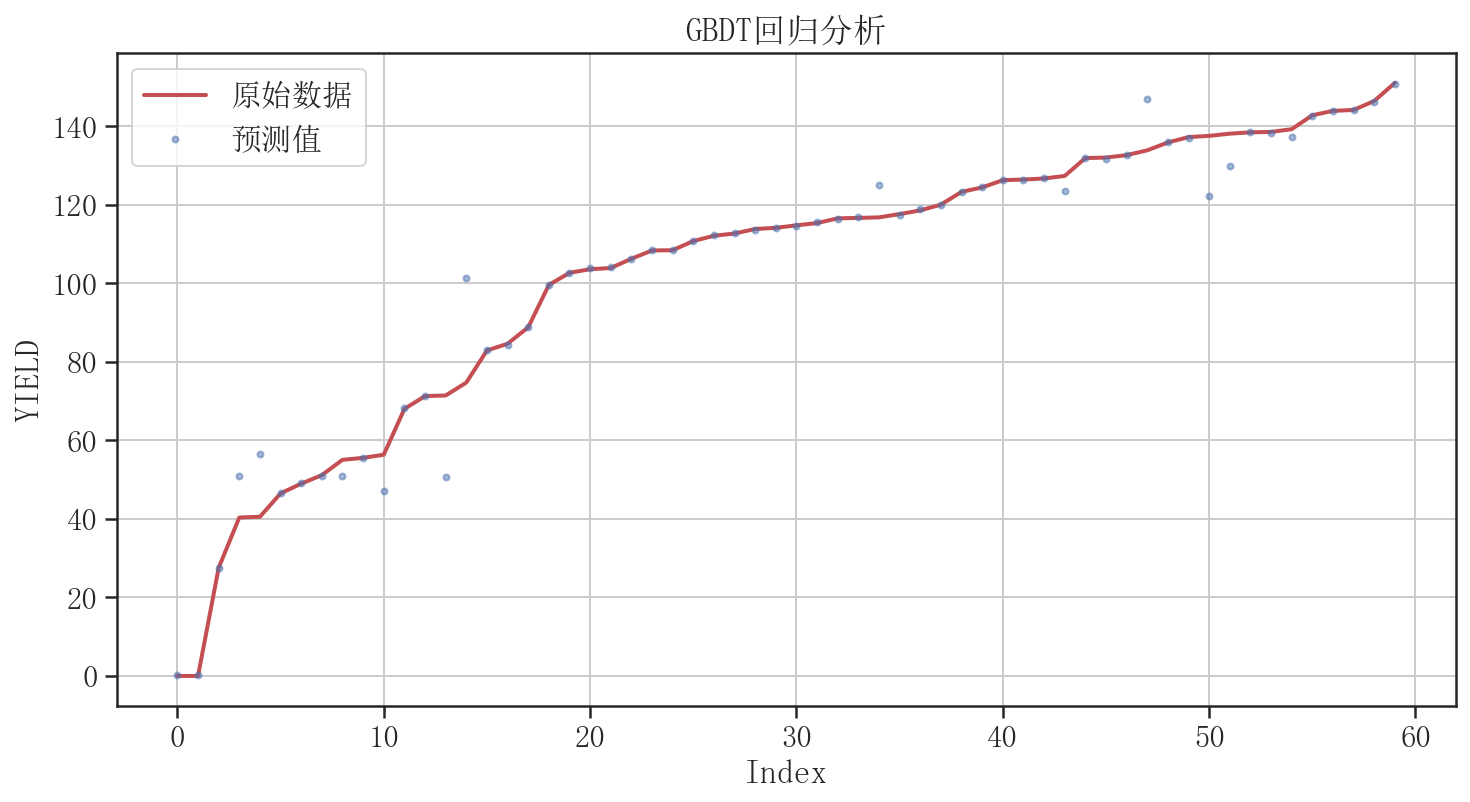

In [10]:
## 网格搜索找到合适的模型
gbdt_r = GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=80,random_state=1) ## 定义模型
gbdt_r.fit(X[GBDTreg.train[2]],y[GBDTreg.train[2]])

## 可视化每个模型在训练数据上的切分平面
Y_pre = gbdt_r.predict(X)#使用最好的参数进行训练测试集
rmse = round(pow(mean_squared_error(y,Y_pre),0.5),4)
mae = round(mean_absolute_error(y,Y_pre),4)
r2 = round(r2_score(y,Y_pre),4)

print('rmse',round(rmse,4))
print('mae',round(mae,4))
print('r2',round(r2,4))

index = np.argsort(y)
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(y)),y[index],"r",
         linewidth=2, label = "原始数据")
plt.plot(np.arange(len(y)),Y_pre[index],"bo",
         markersize=3,alpha = 0.5,label = "预测值")

plt.legend()
plt.grid()
plt.xlabel("Index")
plt.ylabel("YIELD")
plt.title("GBDT回归分析")
plt.show()

LinregressResult(slope=0.9792009408501657, intercept=2.3256525816417195, rvalue=0.9866548871210984, pvalue=2.0132039737492492e-47, stderr=0.02121851053535605, intercept_stderr=2.3194151322994)

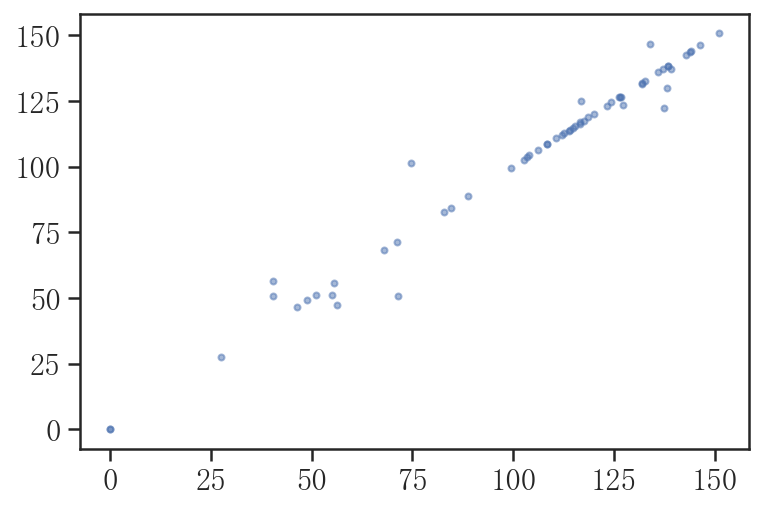

In [11]:
plt.plot(y[index],Y_pre[index],"bo",markersize=3,alpha = 0.5,label = "预测值")
ss.linregress(y[index],Y_pre[index])

In [12]:
##株高空间分布图
myX = xr.open_dataarray(r'O:\93task\DATA\CORE\0818dgp_hxdk100m\0818.nc')
x = myX.lon
y = myX.lat
myPre = np.zeros((myX.shape[1],myX.shape[2]))*np.nan
for ii in range(0,myX.shape[1]):
    for jj in range(0,myX.shape[2]):
        if ~np.isnan(myX[::,ii,jj]).any():
            Y_pre = gbdt_r.predict(myX[:,ii,jj].values.reshape(1, -1))
            myPre[int(ii),int(jj)] = Y_pre

def savetif(data, name):
    data[np.isnan(data)] = -99999 # 方便ArcGIS处理，背景值为 -99999
    da = xr.DataArray(data, coords=[y, x], dims=["y", "x"])
    da.rio.write_crs("epsg:4326", inplace=True) # WGS84坐标系
    da.rio.to_raster(f'{name}.tif')

savetif(myPre,'0818')